# HR Analytics Project
The goal of this project is to assess the average training score of employees and the quality of training sessions from 9 different departments and make suggestions to improve employee engagement, productivity, and overall organizational effectiveness.

# Import Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import data
df = pd.read_csv("Uncleaned_employees_final_dataset (1).csv")
print(df.shape)
df.head()

(17417, 13)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [3]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB


The data types seem normal.

In [4]:
# Check duplicates
df.duplicated().sum()

2

There are 2 duplicated values in our data, proceed to remove...

In [5]:
# Remove duplicates
df.drop_duplicates(inplace = True)

In [6]:
# Check unique values
for x in df:
    if df[x].nunique() < 20:
        print(x, "\n", df[x].unique(), "\n")

department 
 ['Technology' 'HR' 'Sales & Marketing' 'Procurement' 'Finance' 'Analytics'
 'Operations' 'Legal' 'R&D'] 

education 
 ['Bachelors' 'Masters & above' nan 'Below Secondary'] 

gender 
 ['m' 'f'] 

recruitment_channel 
 ['sourcing' 'other' 'referred'] 

no_of_trainings 
 [1 3 2 4 5 7 6 8 9] 

previous_year_rating 
 [nan  3.  1.  2.  4.  5.] 

KPIs_met_more_than_80 
 [1 0] 

awards_won 
 [0 1] 



In [7]:
# Check for missing values
df.isna().sum()

employee_id                 0
department                  0
region                      0
education                 771
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     1363
length_of_service           0
KPIs_met_more_than_80       0
awards_won                  0
avg_training_score          0
dtype: int64

There are some missing values in "education" and "previous_year_rating". Nulls in education are probably because of incomplete data collection process. Previous year rating values may be missing if the employee had not yet started working for the company during the last year's evaluation.

I'll check if the missing data points share the same characteristics with the whole data set.

In [8]:
# Create null subset
edu_na = df[df["education"].isna()]
last_rating_na = df[df["previous_year_rating"].isna()]

# Data summary
edu_na.describe(include = "all")

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
count,771.000000,771,771,0,771,771,771.000000,771.000000,630.000000,771.000000,771.000000,771.000000,771.000000
unique,NaN,9,29,0,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,NaN,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,501,279,NaN,636,428,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39629.871595,NaN,NaN,NaN,NaN,NaN,1.180285,30.670558,3.111111,4.277562,0.273671,0.012970,58.286641
std,22499.452125,NaN,NaN,NaN,NaN,NaN,0.478010,7.082659,1.278551,3.457460,0.446131,0.113219,13.835192
min,141.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,42.000000
25%,19320.500000,NaN,NaN,NaN,NaN,NaN,1.000000,26.000000,2.000000,2.000000,0.000000,0.000000,49.000000
50%,40063.000000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
75%,58365.500000,NaN,NaN,NaN,NaN,NaN,1.000000,34.000000,4.000000,6.000000,1.000000,0.000000,64.000000


In [9]:
# Data summary
last_rating_na.describe(include = "all")

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
count,1363.000000,1363,1363,1222,1363,1363,1363.000000,1363.000000,0.0,1363.0,1363.000000,1363.000000,1363.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelors,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,463,268,1053,989,750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,38891.771093,NaN,NaN,NaN,NaN,NaN,1.327219,26.813646,NaN,1.0,0.364637,0.023478,63.165811
std,22833.470241,NaN,NaN,NaN,NaN,NaN,0.710763,2.775055,NaN,0.0,0.481505,0.151470,14.170571
min,20.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,NaN,1.0,0.000000,0.000000,40.000000
25%,18859.500000,NaN,NaN,NaN,NaN,NaN,1.000000,25.000000,NaN,1.0,0.000000,0.000000,50.000000
50%,39767.000000,NaN,NaN,NaN,NaN,NaN,1.000000,27.000000,NaN,1.0,0.000000,0.000000,60.000000
75%,58001.000000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,NaN,1.0,1.000000,0.000000,78.000000


In [10]:
# Data summary
df.describe(include = "all")

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
count,17415.000000,17415,17415,16644,17415,17415,17415.000000,17415.000000,16052.000000,17415.000000,17415.000000,17415.000000,17415.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelors,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5458,3918,11517,12312,9749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39082.285214,NaN,NaN,NaN,NaN,NaN,1.250761,34.807982,3.345751,5.801493,0.358886,0.023371,63.177720
std,22708.049139,NaN,NaN,NaN,NaN,NaN,0.595720,7.694464,1.265194,4.175632,0.479687,0.151082,13.418314
min,3.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19280.500000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,39115.000000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58838.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,75.000000


There are a few interesting points I want to share after looking at the 3 tables:
- Employees with missing last evaluation test scores are all having 1 year of service, i.e. they've just been working for 1 year in this company. If this test is taken annually at the exact time frame, the length_of_service are most likely rounded up, e.g. people with 9, 10 or 11 months of working are considered 1 year of service. That's why their data are missing: **they didn't take the last year's test.**
- Of missing values in education, the means and medians are generally **lower** than that of the whole data set. They have fewer trainings, are younger, perform worse,... than the average of the data set.

Given the information I have extracted, I will change null values in education to "unknown" because it could represent a different group of educational background, maybe. I'll also impute nulls in last year's scores with average of employees with the same department and similar length of service (~1 year). If I had business domain of HR analytics and background information of this specific company, I would probably have known a better way to handle these missing values. If only I could get some real life experience by working for a renowned company *****wink*****.

In [11]:
# Create copy
df1 = df.copy()

# Impute "unknown" education
df1['education'].fillna('unknown', inplace=True)

In [12]:
# Create impute table
table = df1[df1["length_of_service"] == 1].groupby("department").agg(mean_score = ("previous_year_rating", "mean")).reset_index()

In [13]:
# Impute nulls in previous_year_rating
df1 = df1.merge(table, on = "department", how = "left")
df1["previous_year_rating"].fillna(df1["mean_score"], inplace = True)

In [14]:
# Drop mean_score and ID column
df1 = df1.drop(columns = ["mean_score","employee_id"])
# Check
df1.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,Technology,region_26,Bachelors,m,sourcing,1,24,3.238095,1,1,0,77
1,HR,region_4,Bachelors,f,other,1,31,3.000000,5,0,0,51
2,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.000000,4,0,0,47
3,Procurement,region_2,Bachelors,f,other,3,31,2.000000,9,0,0,65
4,Finance,region_29,Bachelors,m,sourcing,1,30,4.000000,7,0,0,61


# Data Exploration

In [18]:
# Check data summary again
df1.describe(include = "all")

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score,age_join,trainings_per_year,score_change
count,17415,17415,17415,17415,17415,17415.000000,17415.000000,17415.000000,17415.000000,17415.000000,17415.000000,17415.000000,17415.000000,17415.000000,17415.000000
unique,9,34,4,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Sales & Marketing,region_2,Bachelors,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5458,3918,11517,12312,9749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.250761,34.807982,3.341650,5.801493,0.358886,0.023371,63.177720,29.006489,0.376113,1.169831
std,NaN,NaN,NaN,NaN,NaN,0.595720,7.694464,1.218341,4.175632,0.479687,0.151082,13.418314,5.953151,0.424064,0.753267
min,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,18.000000,0.029412,0.420000
25%,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,25.000000,0.142857,0.737500
50%,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,27.000000,0.250000,0.930769
75%,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,75.000000,31.000000,0.500000,1.283333


There are some outliers in age and length_of_service columns. Let's investigate data distribution next.

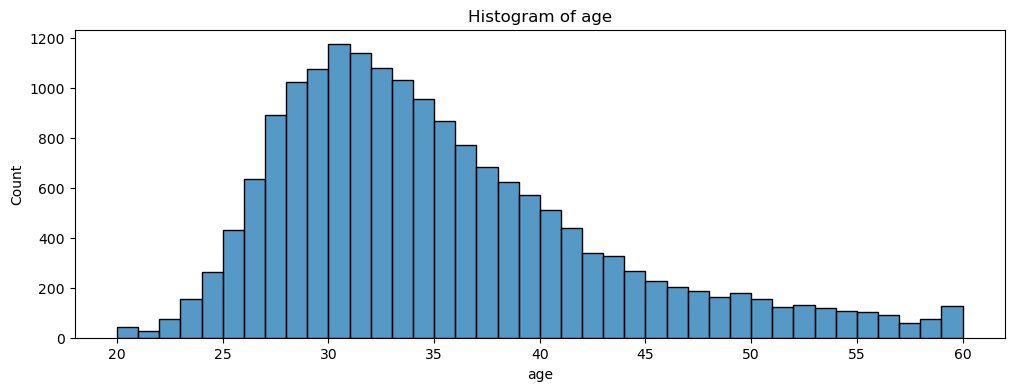

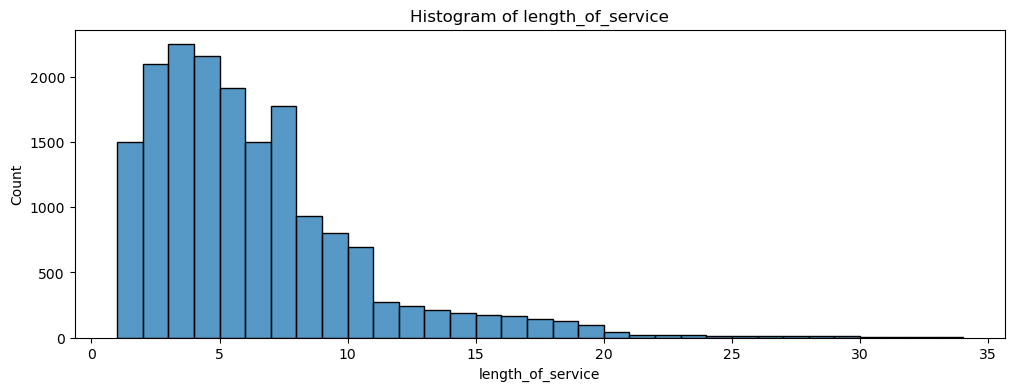

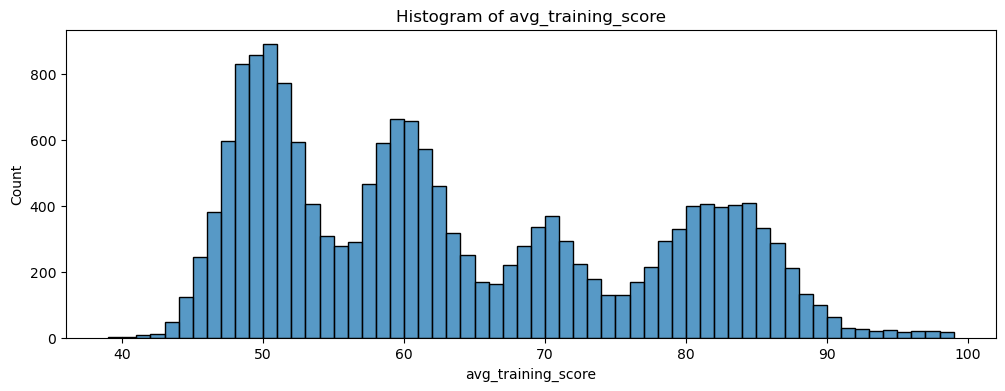

In [31]:
# Check data distribution
plt.figure(figsize = (12,4))
sns.histplot(data = df1, x = "age", bins = 40)
plt.title("Histogram of age")
plt.show()

plt.figure(figsize = (12,4))
sns.histplot(data = df1, x = "length_of_service", bins = 33)
plt.title("Histogram of length_of_service")
plt.show()

plt.figure(figsize = (12,4))
sns.histplot(data = df1, x = "avg_training_score", bins = 60)
plt.title("Histogram of avg_training_score")
plt.show()

Age follows a normal distribution with a fat right tail, indicating that there are many older people working in this company.

Length of service distribution looks more like a log-normal one.

The distribution of average training score is the most interesting with multiple peaks. People tend to score around 50, 60, 70 and 80-85 points. Is is because there are 4 groups of people taking the test and ultimately create 4 normal distributions of average score? This needs further investigation!

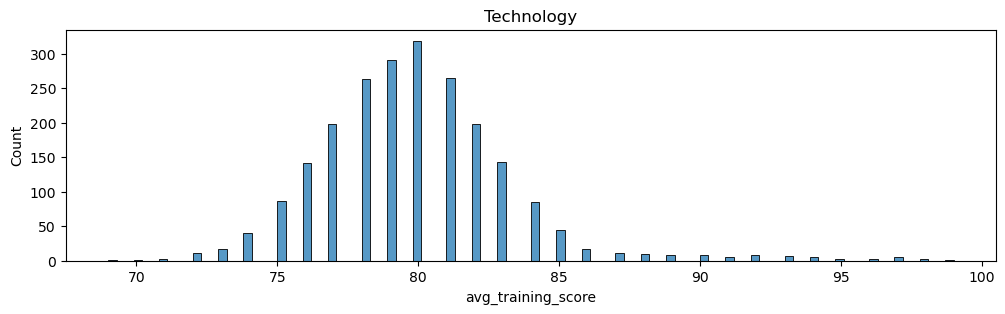

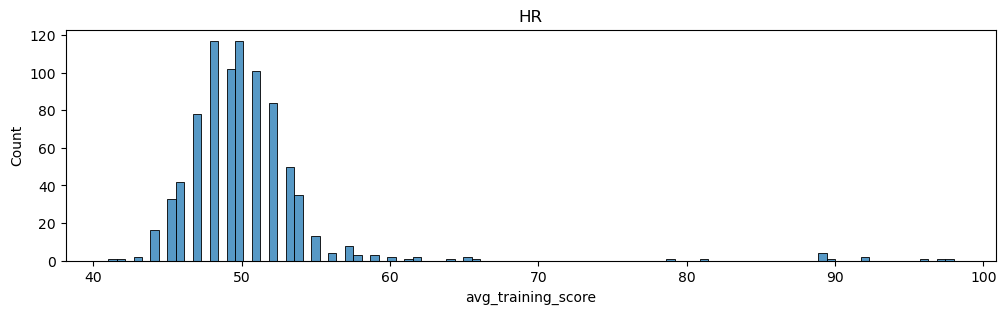

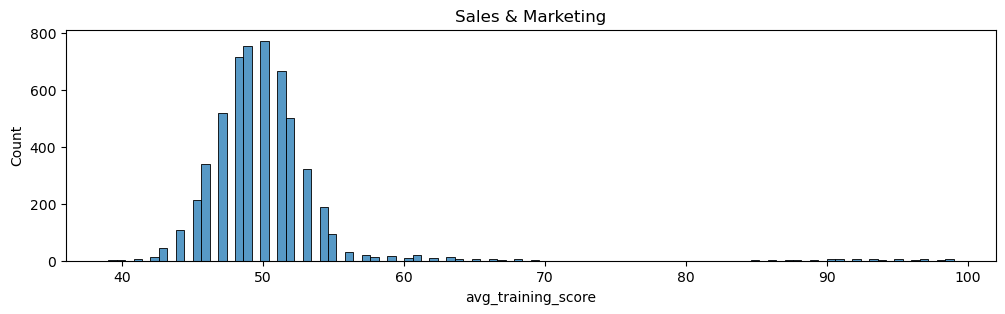

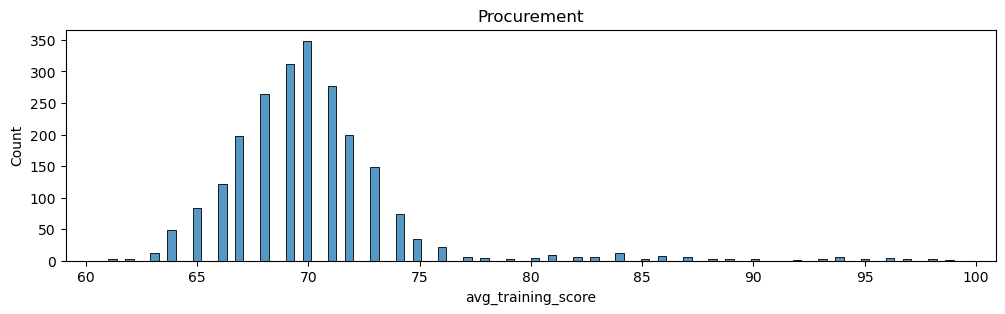

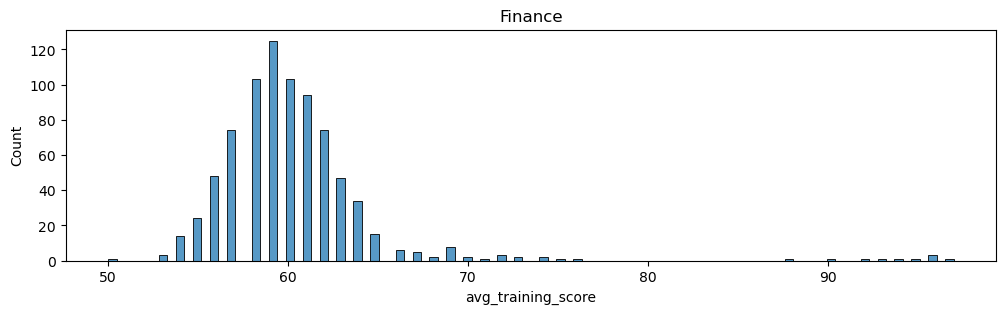

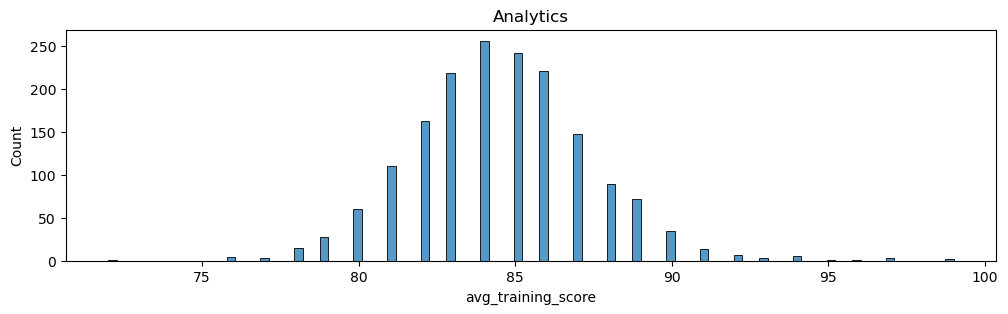

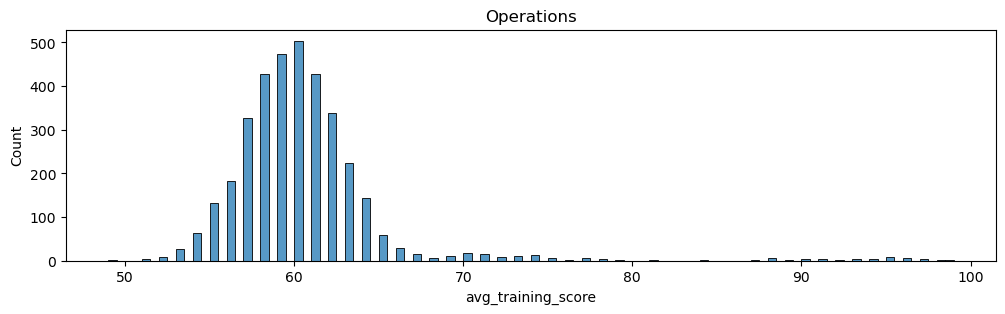

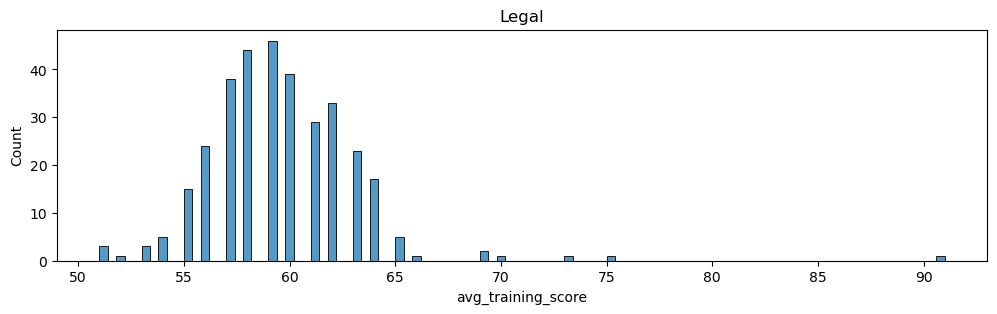

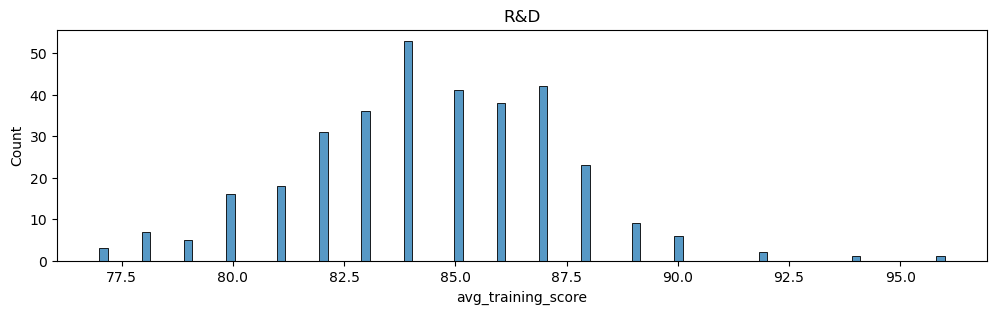

In [20]:
# Distribution of score between different departments
for x in df1["department"].unique():
    plt.figure(figsize = (12,3))
    sns.histplot(data = df1[df1["department"] == x], x = "avg_training_score", bins = 100)
    plt.title(f"{x}")
    plt.show()

The 4 peaks in the training score of the whole data set is the combined peaks of different deparments in the company. Each department score distribution follows a normal curve, together they form 4 peaks. However, I still haven't found out why the distribution of each department also scatter around 50, 60, 70 and 80-85 scores. It's quite hard to find the root cause.

Next, I'll analyze the relationship between variables.

<Axes: xlabel='avg_training_score', ylabel='department'>

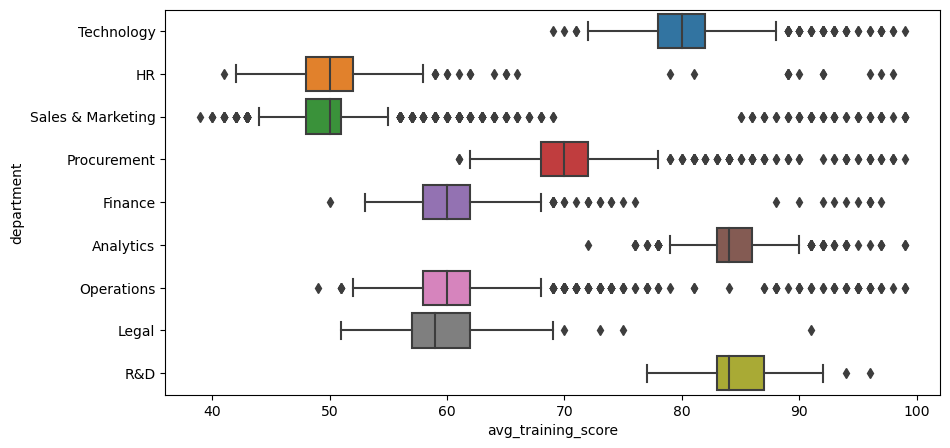

In [21]:
# Department and training score
plt.figure(figsize = (10,5))
sns.boxplot(data = df1, x = "avg_training_score", y = "department")

We can see that the average score of Technology, Analytics and R&D are highest, while Procurement, Finance, Operations and Legal perform slightly worse. HR and Sales & Marketing have the lowest score of performance. There are still people from HR and Sales who have high score test, but the majority of them perform poorly. It's necessary to find the cause and address this matter.

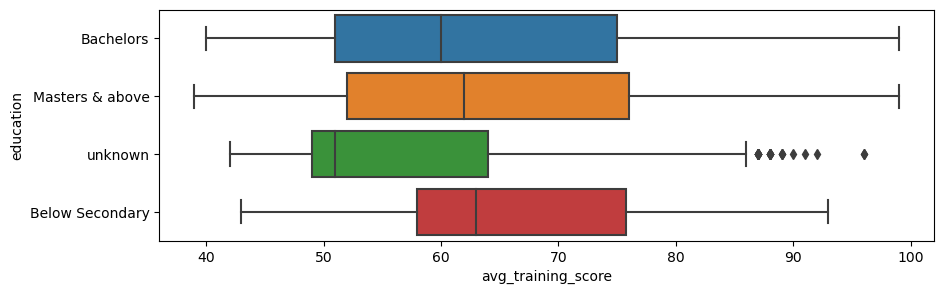

In [22]:
# Education and training score
plt.figure(figsize = (10,3))
sns.boxplot(data = df1, x = "avg_training_score", y = "education")
plt.show()

This is very interesting. Educational background of employees doesn't affect performance that much. Contrary to my initial thought, employees with the education level of below secondary actually perform on par with bachelors or master & above. The unknown category seems to perform worse, I wonder why that is. 

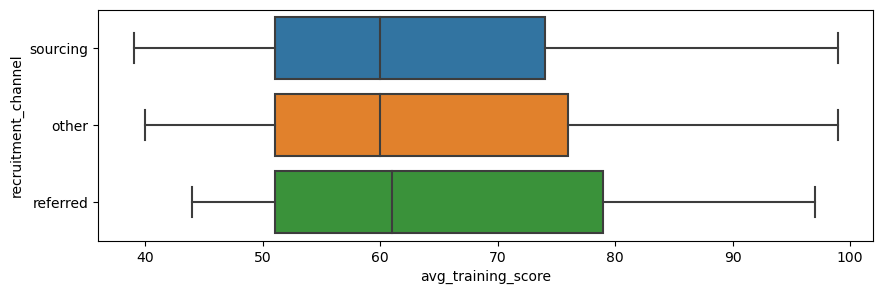

In [23]:
# Recruitment channel and training score
plt.figure(figsize = (10,3))
sns.boxplot(data = df1, x = "avg_training_score", y = "recruitment_channel")
plt.show()

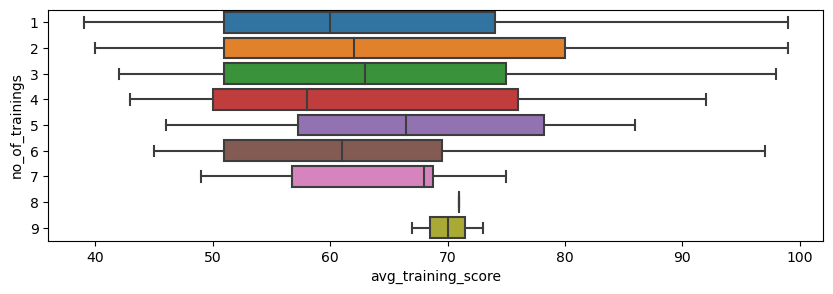

In [24]:
# Number of trainings and training score
plt.figure(figsize = (10,3))
sns.boxplot(data = df1, x = "avg_training_score", y = "no_of_trainings", orient  = "h")
plt.show()

The relationship between number of trainings and training score is not clear.

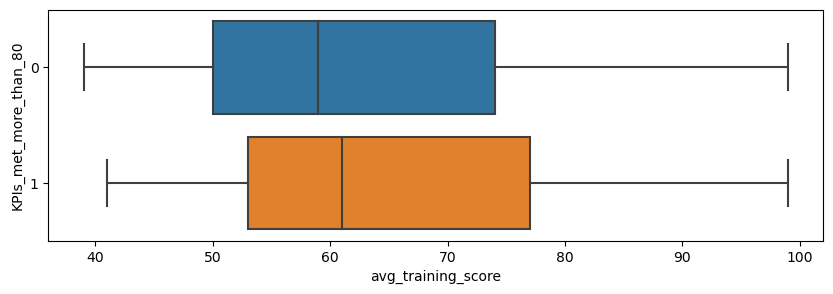

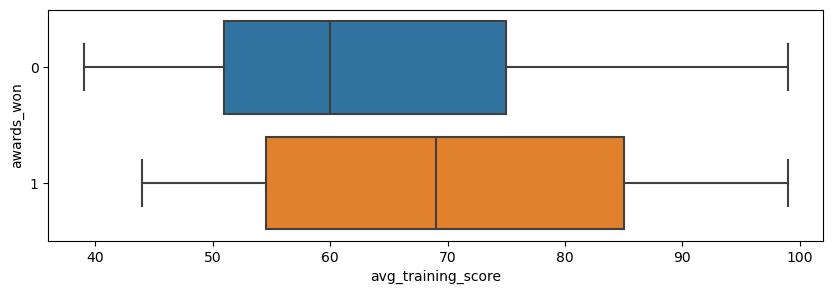

In [25]:
# KPIs_met_more_than_80/awards_won and training score
plt.figure(figsize = (10,3))
sns.boxplot(data = df1, x = "avg_training_score", y = "KPIs_met_more_than_80", orient  = "h")
plt.show()

plt.figure(figsize = (10,3))
sns.boxplot(data = df1, x = "avg_training_score", y = "awards_won", orient  = "h")
plt.show()


Those who often meet their KPI and win awards are generally performing better than those who don't. This is to be expected.

Let's create a heatmap to visualize the relationships between continuous variables.

C:\Users\Hi There!\AppData\Local\Temp\ipykernel_10876\4120817639.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("coolwarm", as_cmap=True))


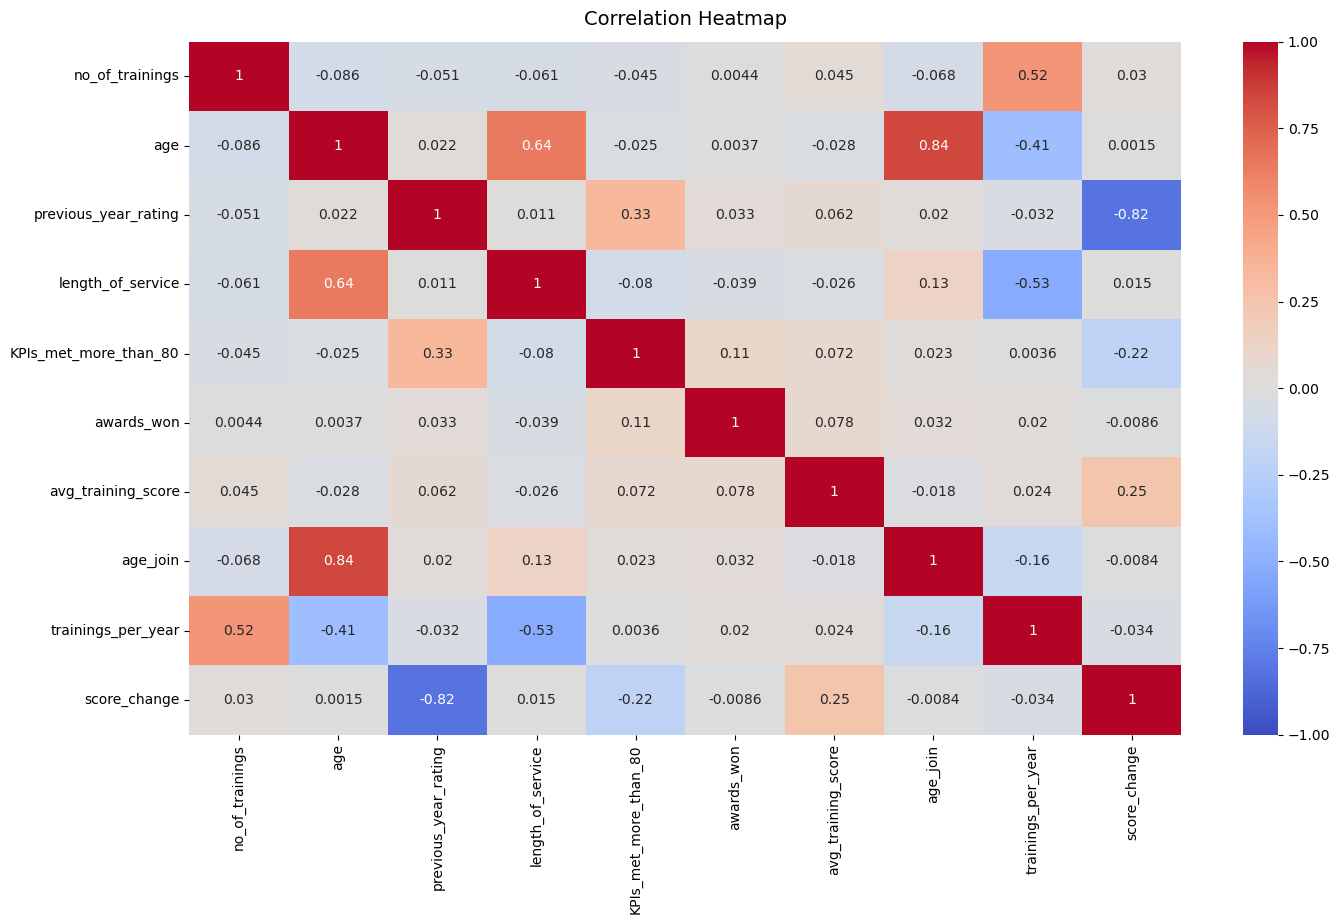

In [26]:
# Correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("coolwarm", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

Data shows that average training score has little or no connection with tranings per year, age when joined, length of service, previous year rating, age or number of ratings.

# Conclusions and suggestions

After analyzing data from HR, I have concluded some major points:
- There are some missing values in "education" and "previous_year_rating". I proceeded to impute them with reasonable values (hopefully).
- Each department's score distribution follows a normal curve, together they form 4 peaks: around 50, 60, 70 and 80-85 points. The reason the scores are mostly distributed around those values is still unknown.
- Employees who often meet their KPI and win awards are generally performing better than those who don't. This is to be expected.

Suggestions:
- Find out why some employees don't have an educational background.
- Reassess performance score from different departments to understand the score spectrum.
- Build a machine learning model to predict the average training score of an employee.